Find Player: (Enter to Skip.) 


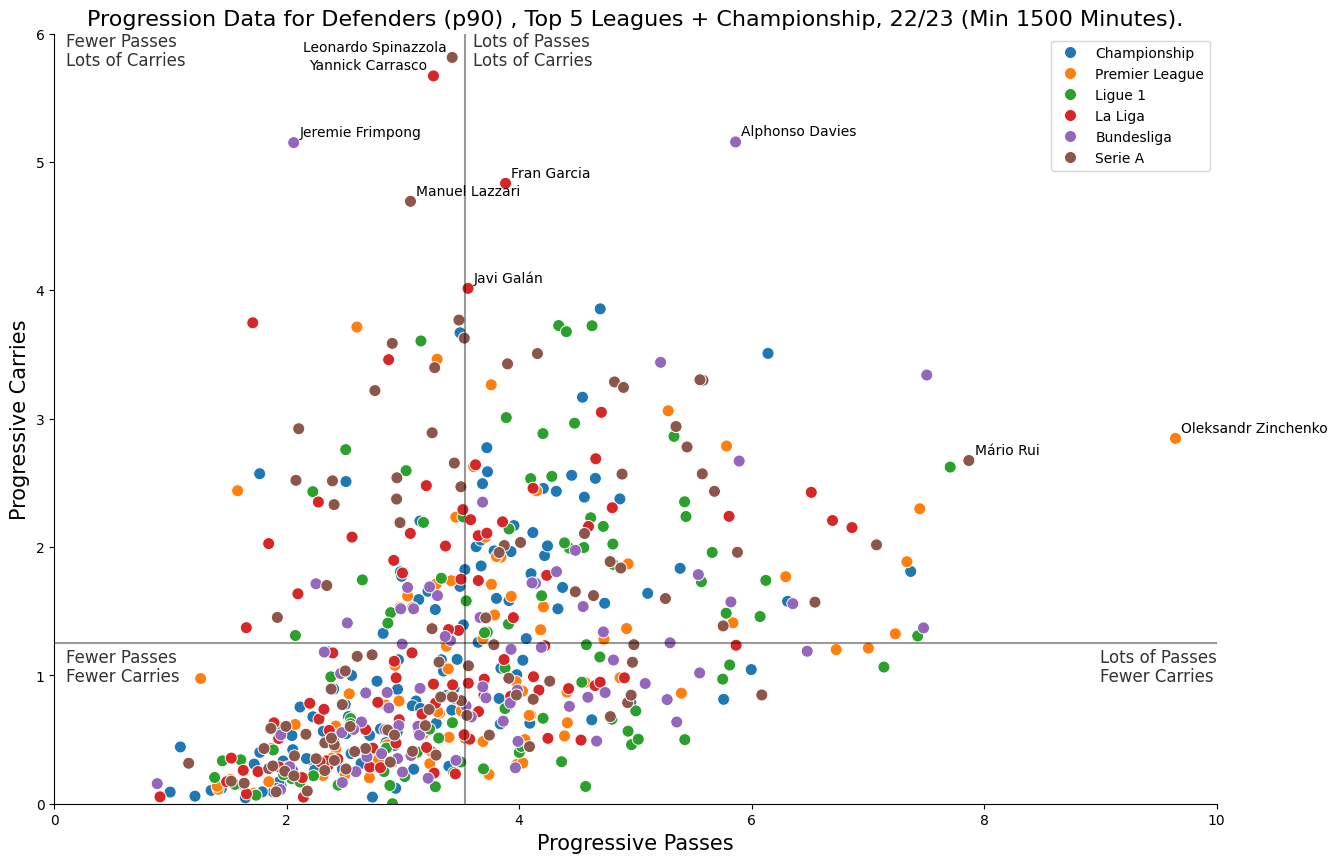

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv
import pandas as pd
from matplotlib import rcParams

data = pd.read_csv('D:/Python/CSVs/T5+Champ22_23.csv', header = [0])

tv = ['DF', 'DF,MF']
Rk = []
Names = []
Prog_Carries = []
Prog_Passes = []
Mins = []
League = []
Corner_Labels = ['Lots of Passes', 'Lots of Carries', 'Fewer Passes', 'Fewer Carries']
Players_Find = []

df = data.copy()
df['Min'] = df['Min'].str.replace(',', '').astype(int)

df['Rk'] = df['Rk'].astype(int)
df['Min'] = df['Min'].astype(int)

df = df[['Rk','Pos', 'Player', 'Min', 'PrgC', 'PrgP']].sort_values('Rk', ascending=True)
defdf = df[df['Pos'].isin(tv)]
defdf = defdf[defdf['Min'] >= 1500]

defdf['PrgC'] = defdf['PrgC'].astype(int)
defdf['PrgP'] = defdf['PrgP'].astype(int)

for a in range(len(defdf)):
    Rk.append(defdf['Rk'].iloc[a])
    Names.append(defdf['Player'].iloc[a])
    Prog_Carries.append(defdf['PrgC'].iloc[a])
    Prog_Passes.append(defdf['PrgP'].iloc[a])
    Mins.append(defdf['Min'].iloc[a])
    
inputted = False
while inputted == False:
    inp = input('Find Player: (Enter to Skip.)')
    if inp != '':
        for f in range (len(x)):
            if inp == Names[f]:
                Players_Find.append(f)
    if inp == '':
        inputted = True

for x in range(len(defdf)):
    if Rk[x] < 750:
        League.append('Championship')
    elif Rk[x] < 1319:
        League.append('Premier League')
    elif Rk[x] < 1925:
        League.append('Ligue 1')
    elif Rk[x] < 2521:
        League.append('La Liga')
    elif Rk[x] < 3036:
        League.append('Bundesliga')
    else:
        League.append('Serie A')
x = []
y = []      

for z in range(len(defdf)):
    x.append((Prog_Passes[z]/Mins[z])*90)
    y.append((Prog_Carries[z]/Mins[z])*90)

Prog_Pass_Avg = 0
for b in range (len(x)):
    Prog_Pass_Avg = Prog_Pass_Avg + x[b]
Prog_Pass_Avg = Prog_Pass_Avg/(len(x))

Prog_Car_Average = 0
for c in range(len(x)):
    Prog_Car_Average = Prog_Car_Average + y[c]
Prog_Car_Average = Prog_Car_Average/len(x)

plt.axvline(Prog_Pass_Avg, 0, 12, color = 'black', alpha = 0.4)
plt.hlines(Prog_Car_Average, 0, 10, color = 'black', alpha = 0.4)

rcParams['figure.figsize'] = 15,10
sns.scatterplot(x=x, y=y, s=75, hue = League)
plt.title('Progression Data for Defenders (p90) , Top 5 Leagues + Championship, 22/23 (Min 1500 Minutes).', fontsize=16)
plt.xlabel('Progressive Passes', fontsize=15)
plt.ylabel('Progressive Carries', fontsize=15)

ax = plt.gca()
ax.set_xlim(0, 10)
ax.set_ylim(0, 6)

for r in range (len(x)):
    if x[r] > 7.75:
        plt.annotate(Names[r], (((x[r])+0.05),((y[r])+0.05)), fontsize=10)
    if y[r]>4 and Names[r] not in ['Leonardo Spinazzola', 'Yannick Carrasco']:
        plt.annotate(Names[r], (((x[r])+0.05),((y[r])+0.05)), fontsize=10)
for r in range(len(x)):
    if Names[r] in ['Leonardo Spinazzola', 'Yannick Carrasco']:
        plt.annotate(
            Names[r],
            ((x[r] - 0.05), (y[r] + 0.05)),
            fontsize=10,
            ha='right'
        )
for g in range (len(Players_Find)):
    plt.annotate(Names[Players_Find[g]], ((float((x[Players_Find[g]]))+0.05),((float(y[Players_Find[g]])+0.05))), fontsize=13)

plt.annotate(Corner_Labels[0], (3.6,5.9), fontsize=12, alpha = 0.8)
plt.annotate(Corner_Labels[1], (3.6,5.75), fontsize=12, alpha = 0.8)

plt.annotate(Corner_Labels[2], (0.1,5.9), fontsize=12, alpha = 0.8)
plt.annotate(Corner_Labels[1], (0.1,5.75), fontsize=12, alpha = 0.8)

plt.annotate(Corner_Labels[2], (0.1,1.1), fontsize=12, alpha = 0.8)
plt.annotate(Corner_Labels[3], (0.1,0.95), fontsize=12, alpha = 0.8)

plt.annotate(Corner_Labels[0], (9,1.1), fontsize=12, alpha = 0.8)
plt.annotate(Corner_Labels[3], (9,0.95), fontsize=12, alpha = 0.8)

sns.despine()
plt.show()